In [4]:
import pandas as pd

In [5]:
# data = pd.read_csv('data/data1_mouse_retina/Gene_expression_table_filtered.txt', sep='\t')

# data = pd.read_csv('data/data2_mesc/Gene_expression_table_filtered.txt',sep='\t')

data = pd.read_csv('Gene_expression_mouse_retina.txt',sep='\t')
data.describe()




,r1_GGCCGCAGTCCG,r1_CTTGTGCGGGAA,r1_GCGCAACTGCTC,r1_GATTGGGAGGCA,r1_GTGCCGCCTCTC,r1_CCTGTGACACAC,r1_AATCTCGTTAAT,r1_GATTTCCTCTGA,r1_GAAGGCTGGAAC,r1_TTCCGGCTGTAC,...,p1_GTTTAAAGAACT,p1_ACATGCGCGGCG,p1_GGTCCGCCGCGC,p1_TTGGAAGGGTCT,p1_CCGCACCTCCCA,p1_GTCTGATGCAAC,p1_AGTGCCAGCTCG,p1_CCAATAGCCGAT,p1_TTAGTCCTACCG,p1_GCATAAAGTATA
count,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,...,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000
mean,8.589254,7.565813,6.426253,4.611973,4.711864,3.712946,3.494410,3.532997,3.344392,3.144609,...,0.696358,0.693833,0.710061,0.649116,0.605121,0.534800,0.673999,0.721601,0.659574,0.541652
std,13.310386,12.715122,11.365662,8.197034,11.282173,7.297173,7.413405,8.235798,5.763625,6.096950,...,1.968212,2.304011,2.672402,1.976010,2.877527,2.539152,1.965365,2.632155,2.038114,2.505149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,4.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,9.000000,7.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,182.000000,229.000000,171.000000,157.000000,261.000000,157.000000,161.000000,278.000000,109.000000,118.000000,...,37.000000,60.000000,72.000000,56.000000,105.000000,77.000000,44.000000,77.000000,80.000000,102.000000


## 1. Apply cell type cluster for the data. (Please store the cluster label for each cell);

### Clusering

In [6]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd

# 假设数据已经加载到 `data` 中，且第一列是基因名，剩余列是表达数据
gene_names = data.iloc[:, 0]  # 获取基因名
data_values = data.iloc[:, 1:]  # 获取基因表达数据

# 应用 t-SNE 降维
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(data_values)

# 使用 K-means 进行聚类
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(data_tsne)

# 将聚类标签和基因名一起存储
data['Gene'] = gene_names
data['Cluster'] = clusters

# 保存聚类标签和基因名
data[['Gene', 'Cluster']].to_csv('cell_type_clusters_tsne.csv', index=False)

# 查看聚类结果
print(data['Cluster'].value_counts())


/opt/homebrew/Caskroom/miniforge/base/envs/BioInfo/lib/python3.12/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[Errno 2] No such file or directory: 'sysctl'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/homebrew/Caskroom/miniforge/base/envs/BioInfo/lib/python3.12/site-packages/joblib/externals/loky/backend/context.py", line 270, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniforge/base/envs/BioInfo/lib/python3.12/subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniforge/base/envs/BioInfo/lib/python3.12/subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexe

Cluster
4    754
0    554
1    527
2    479
3    459
Name: count, dtype: int64


### 2. For the two clusters that have most cells (summary the numbers as table), detect the differential expressed genes across the two cluster. For the two clusters that have most cells (summary the numbers as table), detect the differential expressed genes across the two cluster.Remember to conduct multiple test adjustment. (Please store pvalue, and fold change for each gene; Alpha=0.05, fold change >2 as threshold)

In [7]:
import pandas as pd
from scipy import stats
import numpy as np
from statsmodels.stats.multitest import multipletests

# 假设你的数据已经加载到 `data` 中，聚类标签存储在 `data['Cluster']` 中

# 1. 获取包含最多细胞的两个聚类
cluster_counts = data['Cluster'].value_counts()
top_clusters = cluster_counts.head(2).index  # 获取最多细胞的两个聚类

# 2. 按照这两个聚类进行数据切分
cluster_1_data = data[data['Cluster'] == top_clusters[0]].iloc[:, 1:-1]  # 去掉基因名和聚类标签列
cluster_2_data = data[data['Cluster'] == top_clusters[1]].iloc[:, 1:-1]

# 3. 初始化结果列表
p_values = []
fold_changes = []
genes = data.columns[1:-1]  # 获取基因名（假设第一列是基因名，最后一列是聚类标签）

# 4. 对每个基因进行差异表达分析
for gene in genes:
    # 提取基因的表达数据
    cluster_1_gene_data = cluster_1_data[gene]
    cluster_2_gene_data = cluster_2_data[gene]
    
    # 进行 t 检验
    t_stat, p_value = stats.ttest_ind(cluster_1_gene_data, cluster_2_gene_data, equal_var=False)
    p_values.append(p_value)
    
    # 计算 Fold Change
    mean_cluster_1 = cluster_1_gene_data.mean()
    mean_cluster_2 = cluster_2_gene_data.mean()
    fold_change = np.log2(mean_cluster_1 / mean_cluster_2)  # log2 fold change
    fold_changes.append(fold_change)

# 5. 多重检验校正
rejected, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# 6. 创建差异表达结果表格
results = pd.DataFrame({
    'Gene': genes,
    'p_value': p_values,
    'p_value_corrected': pvals_corrected,
    'Fold_Change': fold_changes,
    'Rejected': rejected
})

# 7. 筛选差异表达基因（p-value < 0.05 和 Fold Change > 2）
deg_results = results[(results['p_value_corrected'] < 0.05) & (np.abs(results['Fold_Change']) > 1)]

# 8. 将结果保存为 CSV 文件
deg_results.to_csv('differentially_expressed_genes.csv', index=False)

# 9. 输出差异表达基因的数量
print(f"Number of differentially expressed genes: {len(deg_results)}")


Number of differentially expressed genes: 739


### 3. For the detected differential expressed genes, apply the gene set enrichment to see what is the most relative biological function.

In [ ]:
import gseapy as gs
import pandas as pd

# 假设我们已经筛选出差异表达基因列表（p_value < 0.05, fold_change > 2）
# 创建一个包含差异表达基因的 DataFrame
# 此处假设 "deg_results" 包含了 DEG 信息，"Gene" 列包含基因名，"p_value" 和 "fold_change" 包含基因的p值和折叠变化

deg_results = pd.read_csv('differentially_expressed_genes.csv')  # 读取差异表达基因结果

# 筛选 p值 < 0.05 且 fold_change > 2 的基因
deg_results_filtered = deg_results[(deg_results['p_value'] < 0.05) & (deg_results['Fold_Change'].abs() > 2)]

# 将筛选出的基因和对应的fold change 存储为字典格式
gene_list = deg_results_filtered.set_index('Gene')['Fold_Change'].to_dict()

# 我们需要将聚类标签（例如 0 或 1）转换成一个列表，表示每个样本所属的组别
sample_groups = data['Cluster'].map({top_clusters[0]: 'Group1', top_clusters[1]: 'Group2'})

# 使用 MSigDB 的 C2 基因集进行 GSEA 分析
gsea = gs.GSEA(
    data=gene_list,           # 输入差异表达基因的基因名与Fold Change
    gene_sets='MSigDB/c2',    # 选择 MSigDB 中的 C2 基因集（可以根据需求选择其他基因集）
    classes=sample_groups,    # 样本的组别信息（例如 Group1 和 Group2）
    outdir='gsea_results',    # 输出目录
    method='signal_to_noise', # 使用 signal-to-noise 方法进行排序
)

# 运行 GSEA 分析
gsea.run()



In [20]:
import gseapy as gp

# 查看可用的基因集
print(gp.get_library_name())
print(1)


['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DGIdb_Drug_Targets_2024', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_CRISPR_GeneDependency_CellLines_2023', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and

In [10]:
import magic
magic_operator=magic.MAGIC()
data_magic =magic_operator.fit_transform(data_log, genes='all_genes')

Calculating MAGIC...
  Running MAGIC on 3517 cells and 2773 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 5.22 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.96 seconds.
    Calculating affinities...
    Calculated affinities in 0.95 seconds.
  Calculated graph and diffusion operator in 7.17 seconds.
  Calculating imputation...
  Calculated imputation in 0.46 seconds.
Calculated MAGIC in 7.67 seconds.


In [11]:
data_magic

,CEP290,CCDC59,PPFIA2,LIN7A,PPP1R12A,SYT1,ZDHHC17,OSBPL8,NAP1L1,KRR1,...,TBL1X,GRIPAP1,PQBP1,PCSK1N,DMD,MAGED1,ARHGEF9,LAS1L,DYNLT3,PJA1
r1_GGCCGCAGTCCG,0.859296,1.087371,1.117315,2.031102,1.072990,3.901267,1.167827,0.973337,2.045325,1.060191,...,1.727568,1.266711,1.444506,2.886363,0.683928,2.611913,1.560123,1.466682,1.980134,2.028817
r1_CTTGTGCGGGAA,0.858963,1.084010,1.107788,2.026499,1.061399,3.895863,1.161326,0.968215,2.044972,1.049161,...,1.714827,1.262114,1.441811,2.878883,0.670830,2.602524,1.545158,1.459452,1.968740,2.021719
r1_GCGCAACTGCTC,0.841128,1.073782,1.064638,1.996021,1.014857,3.875762,1.135604,0.935303,2.039779,1.019326,...,1.669811,1.238325,1.408954,2.859583,0.612246,2.578281,1.488753,1.424511,1.923513,2.003062
r1_GATTGGGAGGCA,0.827208,1.001923,0.969444,1.897501,0.783143,3.678196,0.976139,0.857050,1.864090,0.790792,...,1.364799,1.133293,1.154313,2.650823,0.414491,2.278304,1.353634,1.266187,1.607365,1.781025
r1_GTGCCGCCTCTC,2.485523,1.642868,1.239427,0.443281,1.037330,2.931618,1.181287,1.140630,2.182793,0.965450,...,1.004328,1.475221,1.011312,1.253729,2.587574,1.028403,0.249476,1.166154,0.928542,0.732342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p1_GTCTGATGCAAC,0.078504,0.260474,0.072447,0.261889,0.188763,0.123393,0.098842,0.181563,0.149345,0.099992,...,0.396557,0.079752,0.158089,0.222191,0.217957,0.823715,0.112426,0.093832,0.399662,0.307006
p1_AGTGCCAGCTCG,0.768749,0.418068,0.199583,0.029592,0.152095,1.274562,0.204659,0.249282,0.758597,0.172833,...,0.172893,0.231453,0.164494,0.347308,0.819957,0.274085,0.057490,0.222453,0.191608,0.109253
p1_CCAATAGCCGAT,0.752173,0.521683,0.154351,0.046376,0.140196,1.182632,0.142530,0.242308,0.738568,0.183581,...,0.225004,0.250447,0.182813,0.368918,0.839016,0.231629,0.039460,0.196274,0.146370,0.117265
p1_TTAGTCCTACCG,0.479748,0.347764,0.376339,0.639938,0.260023,2.019638,0.219305,0.229750,0.646395,0.208987,...,0.364369,0.355601,0.331632,0.492378,0.405176,0.486291,0.366189,0.373868,0.181545,0.496820


# Task 3: t-SNE

In [12]:
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2)
data_tsne =tsne.fit_transform(data_log)
data_magic_tsne = tsne.fit_transform(data_magic)
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(data_tsne[:,0], data_tsne[:,1], s=3)
axs[0].set_title('t-SNE Projection before imputation')
axs[0].set_xlabel('t-SNE 1')
axs[0].set_ylabel('t-SNE 2')

axs[1].scatter(data_magic_tsne[:,0], data_magic_tsne[:,1], s=3)
axs[1].set_title('t-SNE Projection after imputation')
axs[1].set_xlabel('t-SNE 1')
axs[1].set_ylabel('t-SNE 2')

plt.tight_layout()

plt.show()



: 

: 

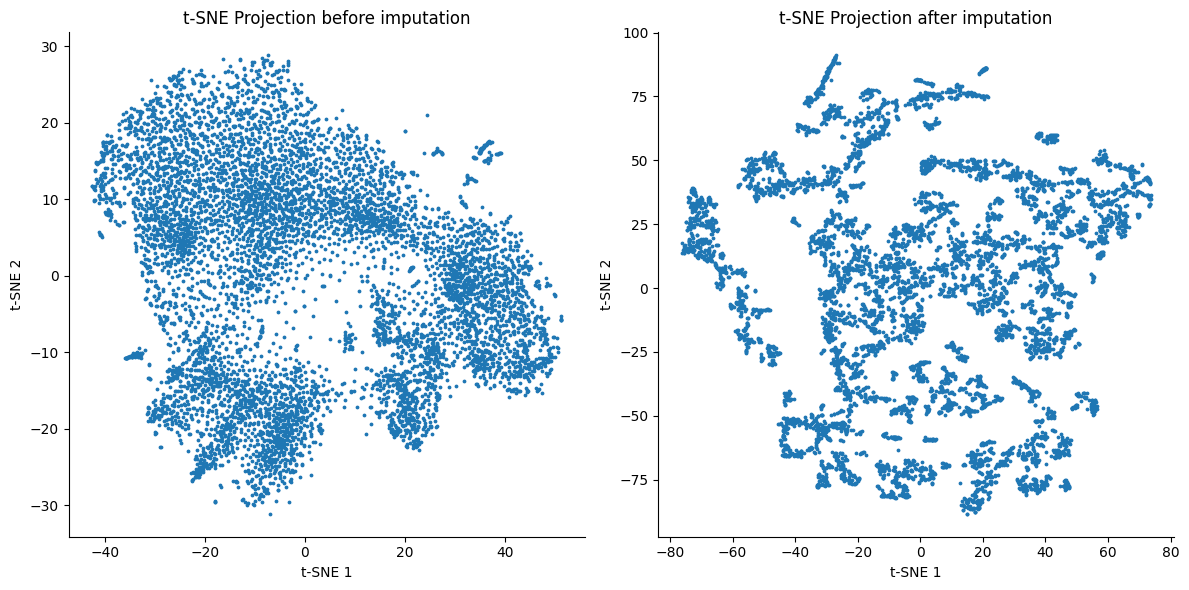

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(data_tsne[:,0], data_tsne[:,1], s=3)
axs[0].set_title('t-SNE Projection before imputation')
axs[0].set_xlabel('t-SNE 1')
axs[0].set_ylabel('t-SNE 2')

axs[1].scatter(data_magic_tsne[:,0], data_magic_tsne[:,1], s=3)
axs[1].set_title('t-SNE Projection after imputation')
axs[1].set_xlabel('t-SNE 1')
axs[1].set_ylabel('t-SNE 2')

plt.tight_layout()

plt.show()



# Task 4: Dimension

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca =pca.fit_transform(data_log)

import umap
reducer =  umap.UMAP(n_neighbors=5)

data_umap = reducer.fit_transform(data_log)


NameError: name 'data_log' is not defined

# Task 5: Clustering 

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans_labels = kmeans.fit_predict(data_umap)

from sklearn.cluster import AgglomerativeClustering

model =AgglomerativeClustering(n_clusters =10, metric = 'euclidean', linkage='ward')

hierarchical_labels = model.fit_predict(data_umap)